In [15]:
# default_exp visualizations

In [5]:
#export
import pandas as pd
import directlfq.normalization as lfq_norm
import directlfq.protein_intensity_estimation as lfq_protint
import matplotlib.pyplot as plt

class IonTraceCompararisonPlotter():
    def __init__(self, proteome_df, selected_protein):
        self._proteome_df = proteome_df
        self._selected_protein = selected_protein
        self._protein_df_before_norm = None
        self._protein_df_after_norm = None

        self.axes = plt.subplots(ncols=2)[1]
        self._prepare_data_and_plot_ion_traces_before_and_after_normalization()

    def _prepare_data_and_plot_ion_traces_before_and_after_normalization(self):
        self._define_protein_dataframes()
        self._plot_before_norm()
        self._plot_after_norm()

    def _define_protein_dataframes(self):
        self._define_protein_df_before_norm()
        self._define_protein_df_after_norm()

    def _define_protein_df_before_norm(self):
        self._protein_df_before_norm = pd.DataFrame(self._proteome_df.loc[self._selected_protein])
    
    def _define_protein_df_after_norm(self):
        self._protein_df_after_norm = lfq_norm.NormalizationManagerProtein(self._protein_df_before_norm.copy(), num_samples_quadratic = 10).complete_dataframe

    def _plot_before_norm(self):
        IonTraceVisualizer(self._protein_df_before_norm,ax= self.axes[0])
    
    def _plot_after_norm(self):
        visualizer = IonTraceVisualizer(self._protein_df_after_norm, ax=self.axes[1])
        median_list = lfq_protint.get_list_with_protein_value_for_each_sample(self._protein_df_after_norm, min_nonan=1)
        visualizer.add_median_trace(median_list)
        

In [6]:
#export
import seaborn as sns

class IonTraceVisualizer():
    def __init__(self, protein_df, ax):
        self._protein_df = protein_df
        self._plot_df = None
        self._num_samples = None
        self._ax = ax
        self._define_inputs_and_plot_ion_traces()
    
    def _define_inputs_and_plot_ion_traces(self):
        self._define_num_samples()
        self._define_prepared_dataframe()
        self._plot_ion_traces()

    def _define_num_samples(self):
        self._num_samples = len(self._protein_df.columns)

    def _plot_ion_traces(self):
        sns.lineplot(data = self._plot_df, ax=self._ax, legend=None)
        self._ax.set_xticks(range(self._num_samples))
    
    def _define_prepared_dataframe(self):
        self._plot_df = self._protein_df
        self._plot_df.columns = range(self._num_samples)
        self._plot_df = self._plot_df.T

    def add_median_trace(self, list_of_median_values):
        sns.lineplot(x = range(len(list_of_median_values)), y = list_of_median_values, ax=self._ax,color='black', linewidth=3)
    



### Test Protein Visualization

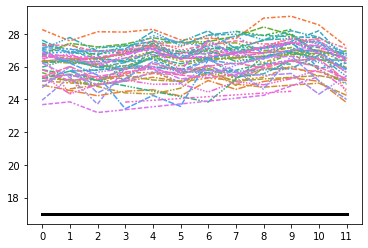

In [7]:
#hide
import matplotlib.pyplot as plt
import pandas as pd
import directlfq.utils as lfq_utils

def test_that_iontracevisualized_produces_desired_plot():
    example_prots = "test_data/unit_tests/protein_normalization/example_proteins.tsv"
    protein_df = pd.read_csv(example_prots, sep = "\t")
    protein_df = lfq_utils.index_and_log_transform_input_df(protein_df)
    protein_df = protein_df.loc["A0A024R4E5"]

    ax = plt.subplot()
    pviz = IonTraceVisualizer(protein_df, ax)
    pviz.add_median_trace([17 for x in range(len(protein_df.columns))])

    assert len(ax.lines) == len(protein_df.index)+1

test_that_iontracevisualized_produces_desired_plot()

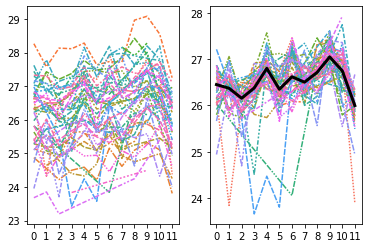

In [8]:
#hide
import matplotlib.pyplot as plt
import pandas as pd
import directlfq.utils as lfq_utils

def test_that_iontracecomparisonplotter_produces_desired_plots():
    example_prots = "test_data/unit_tests/protein_normalization/example_proteins.tsv"
    protein_df = pd.read_csv(example_prots, sep = "\t")
    protein_df = lfq_utils.index_and_log_transform_input_df(protein_df)
    complotter = IonTraceCompararisonPlotter(protein_df, selected_protein="A0A024R4E5")
    assert len(complotter.axes[0].lines) == len(protein_df.loc["A0A024R4E5"].index)
    assert len(complotter.axes[1].lines) == len(protein_df.loc["A0A024R4E5"].index)+1

test_that_iontracecomparisonplotter_produces_desired_plots()